   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


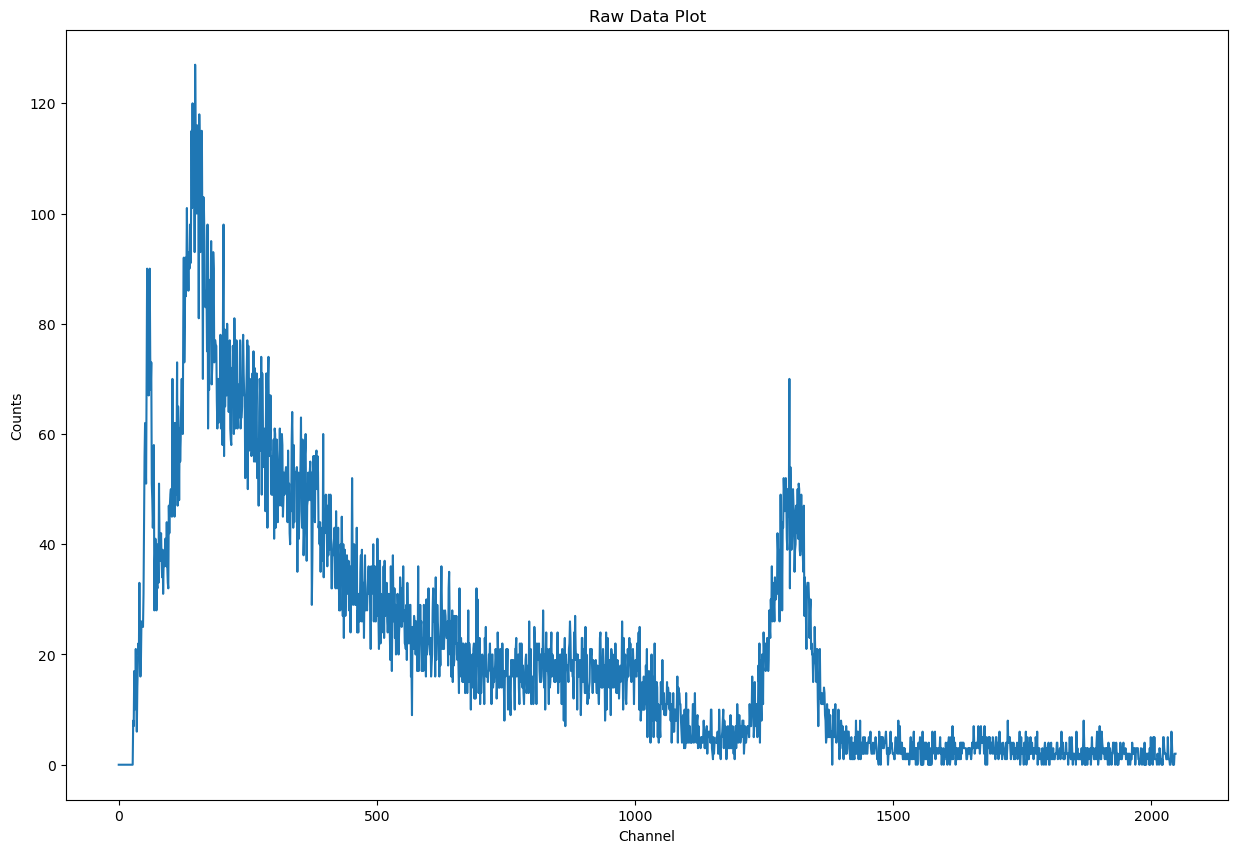

In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Mn_54 = pd.read_csv("Mn_54.csv") # create pandas dataframe
print(df_Mn_54.head()) # print first 5 rows


##############
# Plot data
##############

x_Mn_54 = df_Mn_54["Channel"] # grab column
y_Mn_54 = df_Mn_54["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Raw Data Plot")
plt.plot(x_Mn_54, y_Mn_54)
plt.show()

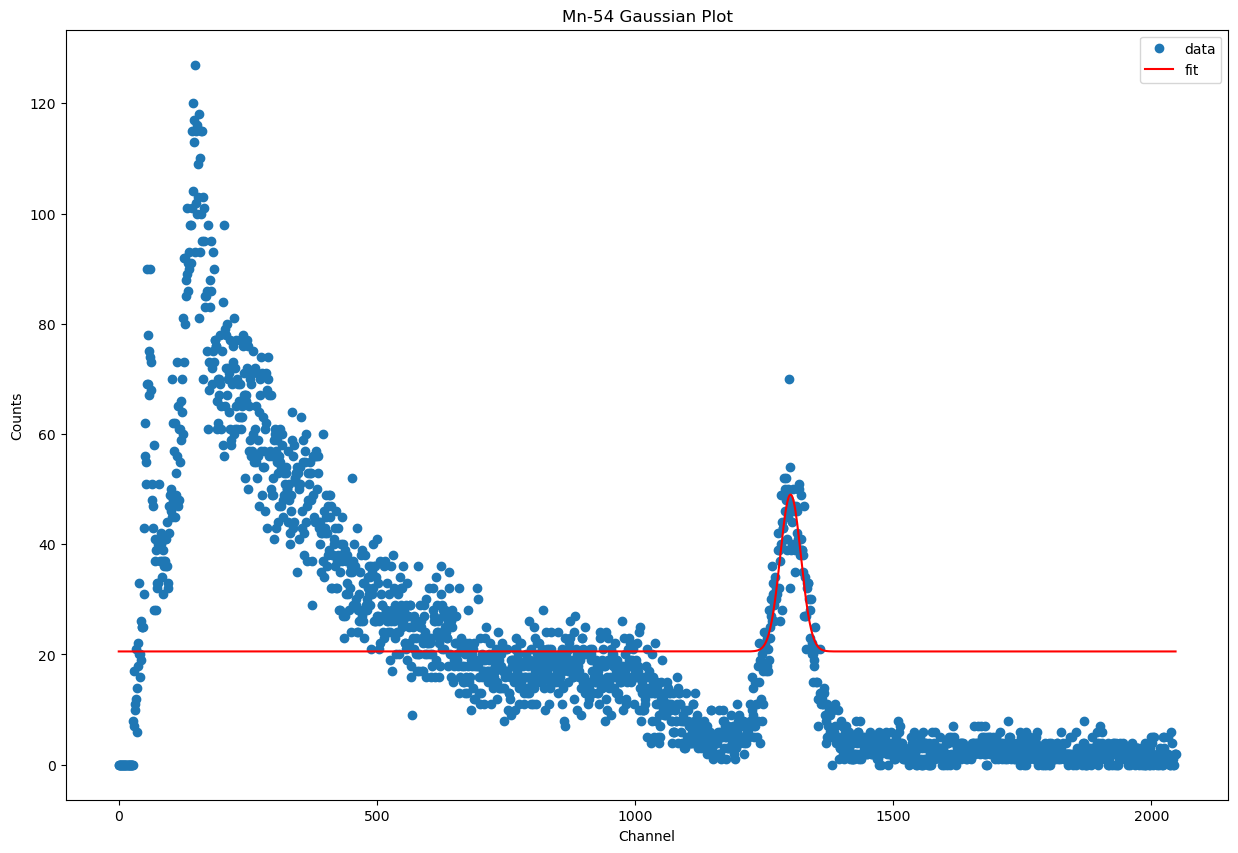

In [6]:
########################
# Input constant values
########################

a_Mn_54 = 58 # amplitude                   
mean_Mn_54 = 1350 # middle of graph                 
h_Mn_54 = 20 # vertical shift                  
sigma_Mn_54 = 20 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_Mn_54, a_Mn_54, mean_Mn_54, sigma_Mn_54, h_Mn_54):
    fit = a_Mn_54*np.exp((-(x_Mn_54-mean_Mn_54)**2)/(2*sigma_Mn_54**2)) + h_Mn_54
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Mn_54, pcov_Mn_54 = curve_fit(gaus, x_Mn_54, y_Mn_54, p0=[a_Mn_54, mean_Mn_54, sigma_Mn_54, h_Mn_54]) # solves for a, mean, sigma, h
y_Mn_54_fit = gaus(x_Mn_54, *popt_Mn_54) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Mn_54, y_Mn_54, 'o', label="data")
plt.plot(x_Mn_54, y_Mn_54_fit, 'r-', label='fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Mn-54 Gaussian Plot")
plt.legend()
plt.show()

In [7]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_Mn_54[0],
      "\n Fit Mean: ", popt_Mn_54[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_Mn_54[2],
      "\n Fit Height: ", popt_Mn_54[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_Mn_54)

Fit Amplitude:  28.46778366171312 
 Fit Mean:  1301.275528289146 
 Fit Sigma (distance from mean to sides):  -20.119106375019953 
 Fit Height:  20.55143413136649

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 2.22559945e+01  1.00178134e-05  1.02178380e+01 -1.91402952e-01]
 [ 1.00178134e-05  1.46937457e+01  7.07561921e-06 -5.38088601e-10]
 [ 1.02178380e+01  7.07561921e-06  1.49634512e+01  2.70194531e-01]
 [-1.91402952e-01 -5.38088601e-10  2.70194531e-01  2.70684650e-01]]
